# TASK 3

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TEST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
data = pd.read_csv("sample-data.csv")

In [49]:
data.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [50]:
data.tail()

,id,description
495,496,Cap 2 bottoms - Cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...
499,500,All-wear shorts - Time to simplify? Our All-We...


In [51]:
data.columns

Index(['id', 'description'], dtype='object')

In [52]:
data.isnull().sum()

id             0
description    0
dtype: int64

In [53]:
df = pd.DataFrame(data)

# 1. Add a column with the length of each description

In [54]:
df['description_length'] = df['description'].apply(len)


# Basic descriptive statistics for description length

In [55]:
description_stats = df['description_length'].describe()
print(description_stats)

count     500.000000
mean     1122.180000
std       424.608191
min       416.000000
25%       798.500000
50%      1046.000000
75%      1393.500000
max      3540.000000
Name: description_length, dtype: float64


# 2. Tokenization and cleaning

In [56]:
stop_words = set(stopwords.words('english'))
df['cleaned_description'] = df['description'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['cleaned_description'] = df['cleaned_description'].apply(lambda x: x.lower().split())
df['cleaned_description'] = df['cleaned_description'].apply(lambda x: [word for word in x if word not in stop_words])

### Flatten the list of all words in descriptions to count the most common words

In [57]:
all_words = [word for desc in df['cleaned_description'] for word in desc]
word_freq = Counter(all_words)

# 3. Plotting: Description length distribution

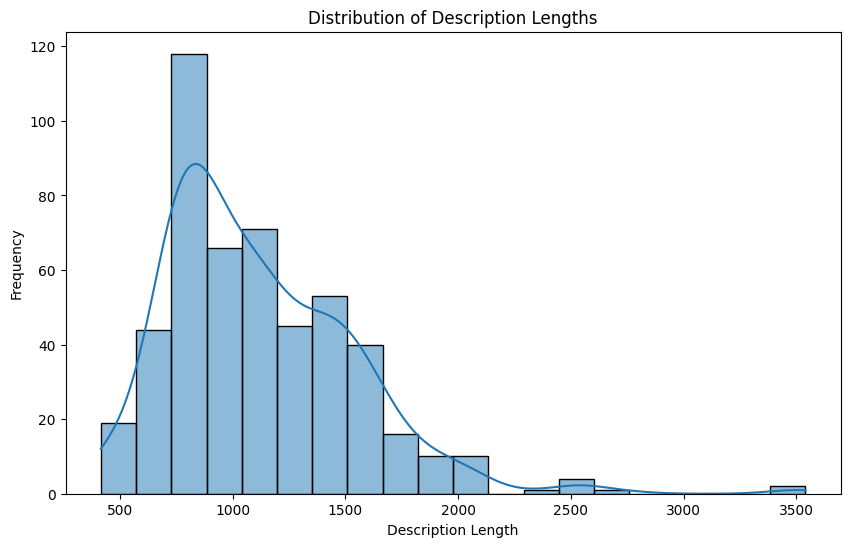

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], kde=True, bins=20)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

# 4. Plotting: Most common words

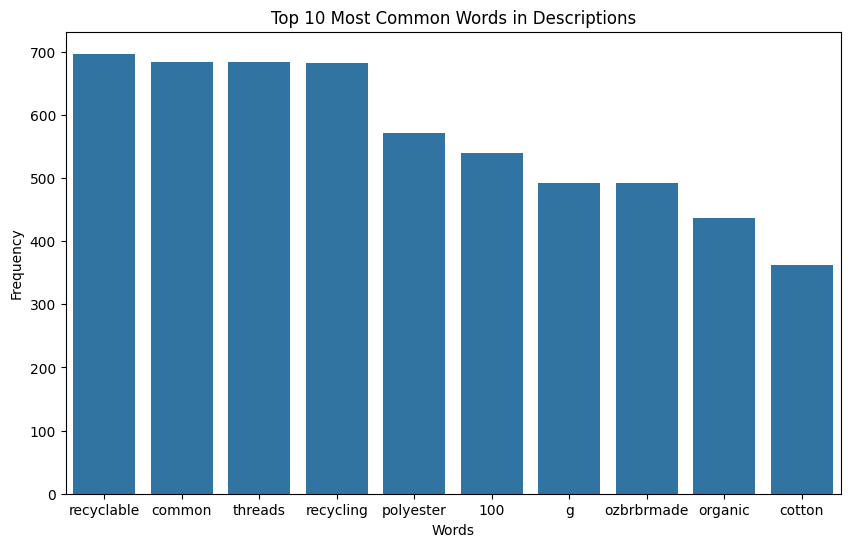

In [59]:
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words in Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
